In [1]:
from run_dnerf import config_parser, create_nerf
import matplotlib.pyplot as plt
import torch
from load_blender import pose_spherical
from run_dnerf import render_path
from run_dnerf_helpers import to8b

In [2]:
# set cuda
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# get config file
config_file = "configs/trex.txt"
parser = config_parser()
args = parser.parse_args(f'--config {config_file}')

# set render params
hwf = [400, 400, 555.555]
_, render_kwargs_test, _, _, _ = create_nerf(args)
render_kwargs_test.update({'near' : 2., 'far' : 6.})

NeRF type selected: direct_temporal
Found ckpts ['./logs\\trex\\100000.tar', './logs\\trex\\200000.tar', './logs\\trex\\300000.tar', './logs\\trex\\400000.tar', './logs\\trex\\500000.tar', './logs\\trex\\600000.tar', './logs\\trex\\700000.tar', './logs\\trex\\800000.tar']
Reloading from ./logs\trex\800000.tar


## Generate Frame

In [3]:
def generate_img(time, azimuth, elevation):
    assert 0. <= time <= 1.
    assert -180 <= azimuth <= 180
    assert -180 <= elevation <= 180
    
    render_poses = torch.unsqueeze(pose_spherical(azimuth, elevation, 4.0), 0).to(device)
    render_times = torch.Tensor([time]).to(device)

    with torch.no_grad():
            rgbs, _ = render_path(render_poses, render_times, hwf, args.chunk, render_kwargs_test, render_factor=args.render_factor)
    rgbs = to8b(rgbs)
    return rgbs[0]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\USER\anaconda3\envs\Pytorch_CV\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.05s/it]


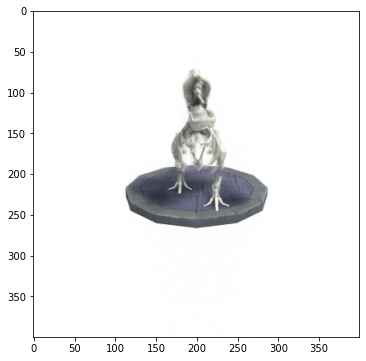

In [4]:
# genearte
time = .5  # in [0,1]
azimuth = 180  # in [-180,180]
elevation = -20  # in [-180,180]
img = generate_img(time, azimuth, elevation)

# display
plt.figure(2, figsize=(20,6))
plt.imshow(img)
plt.show()